<a href="https://colab.research.google.com/github/ThomasDsl/EEIGM/blob/main/testpartiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test pour entrainement

In [ ]:
#j'importe image
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving BahYH-CCAAAtjVd-1607500029.jpg to BahYH-CCAAAtjVd-1607500029.jpg


/tmp/ipython-input-4208622165.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
/tmp/ipython-input-4208622165.py:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


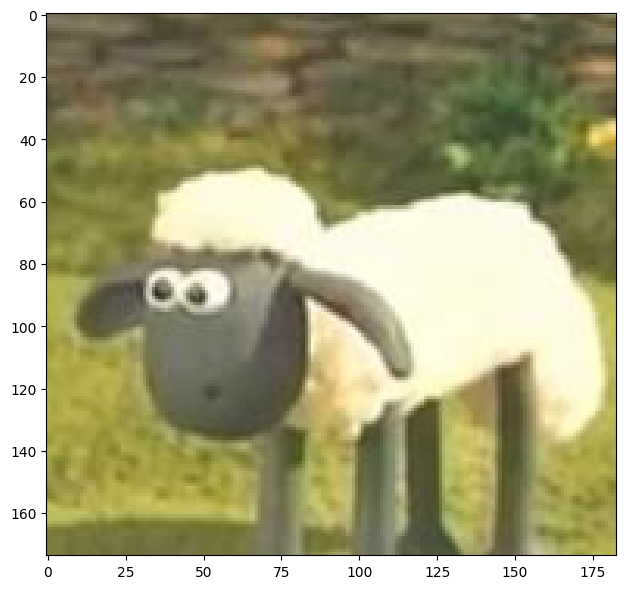

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('BahYH-CCAAAtjVd-1607500029.jpg') # read image using imread function
I.shape

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

Si on a trois chiffres alors c'est une image en couleur.
pour la convertir en niveau de gris on applique la commande suivante :
IG = sk.color.rgb2gray(I)

In [ ]:
IG = sk.color.rgb2gray(I)
IG.shape

(174, 183)

il ne reste plus que deux composante, l'image est bien en niveau de gris

si on veut 2 images à coté

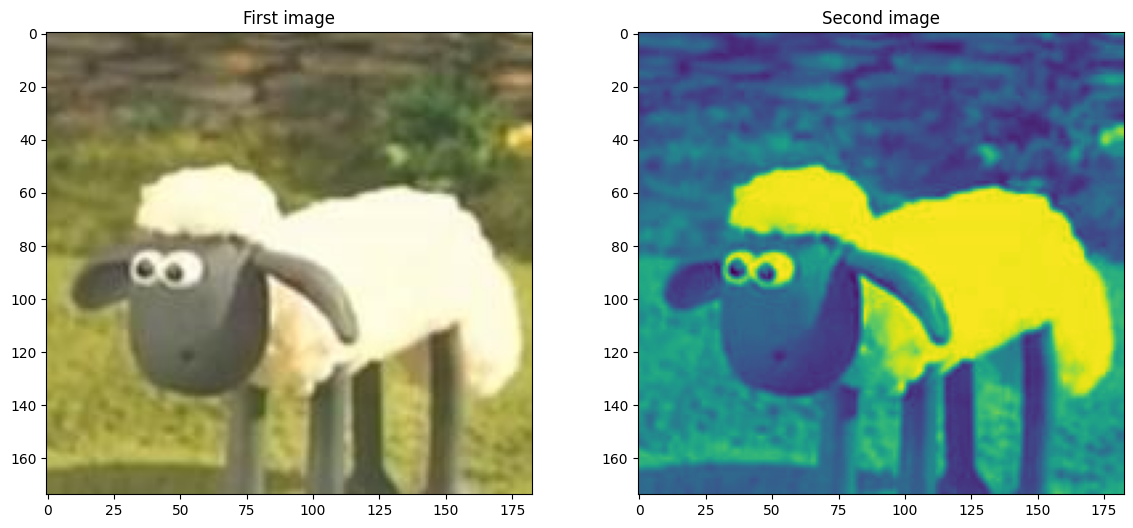

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(14, 6))
plt.subplot(121) #1 ligne et 2 colonne image est dans le "premier carré"
plt.imshow(I) # visualize image using imshow function
plt.title('First image')

plt.subplot(122) #1 ligne et 2 colonnes image est dans le "deuxième carré"
plt.imshow(IG) # visualize image using imshow function
plt.title('Second image')
plt.show()

#plt.savefig('/content/drive/MyDrive/UL/test_images/two_images.png') #sert à enregistrer les graphique obtenu

voir les pixels le long d'une ligne

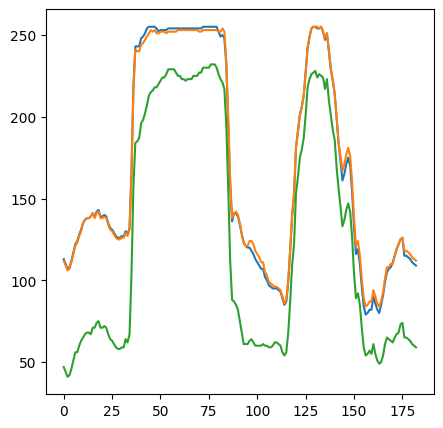

In [ ]:
Irow = I[60,:] # pixels along the row 60

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

même chose avec l'image en niveau de gris

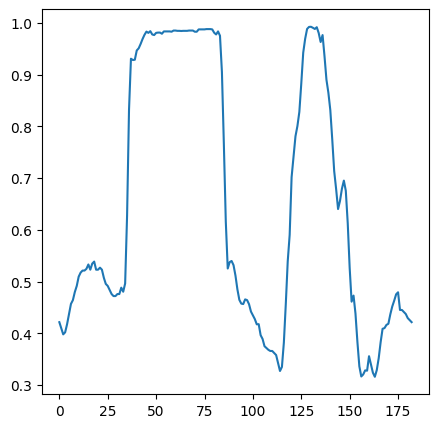

In [ ]:
Irow2 = IG[60,:] # pixels along the row 60

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow2)
plt.show()

Mais on remarque que l'échelle ne va pas de 0 à 255, il faut lui appliquer un filtre noir et blanc.

/tmp/ipython-input-3234626014.py:10: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


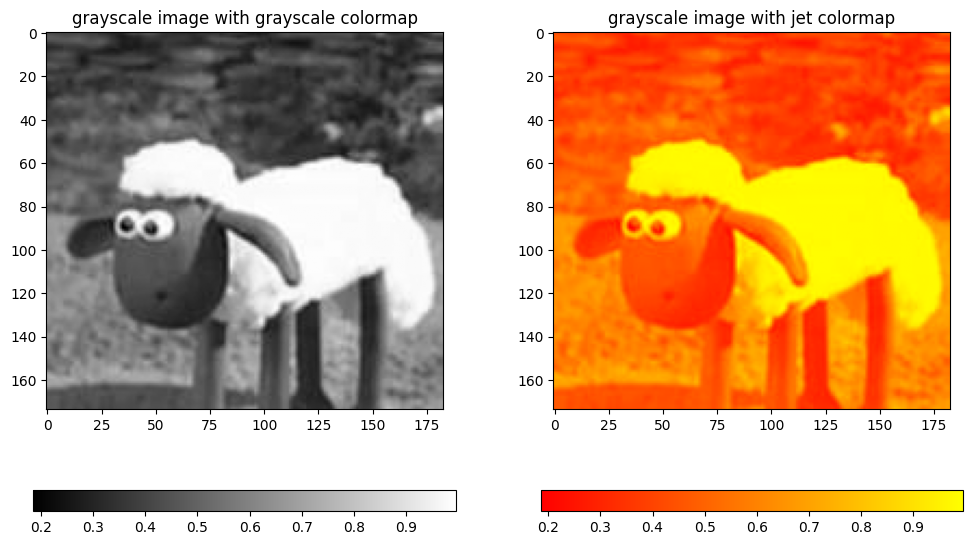

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar
im2 = ax[1].imshow(IG,cmap=plt.cm.autumn) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar
sk.io.show()

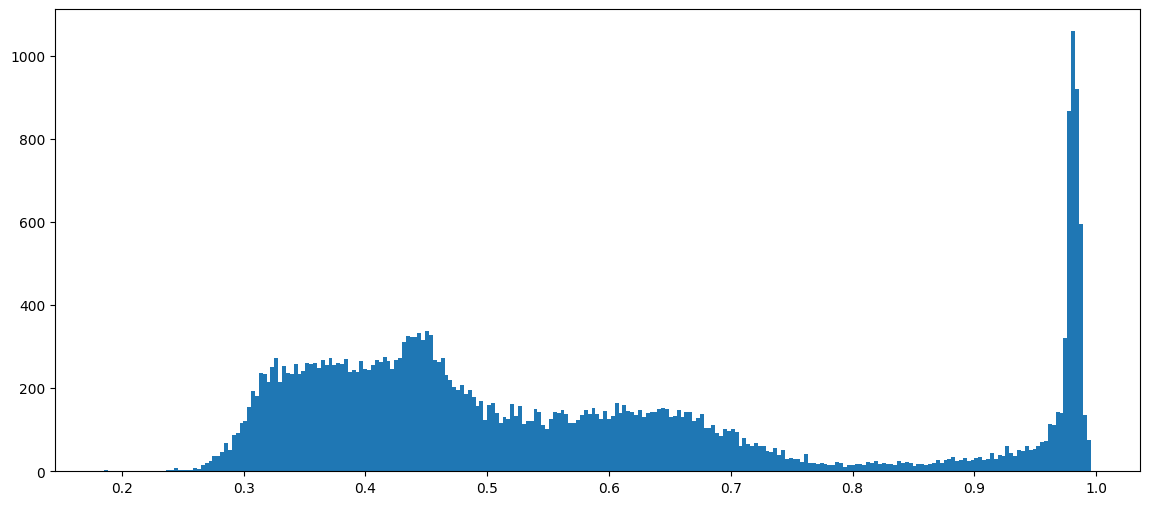

In [ ]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

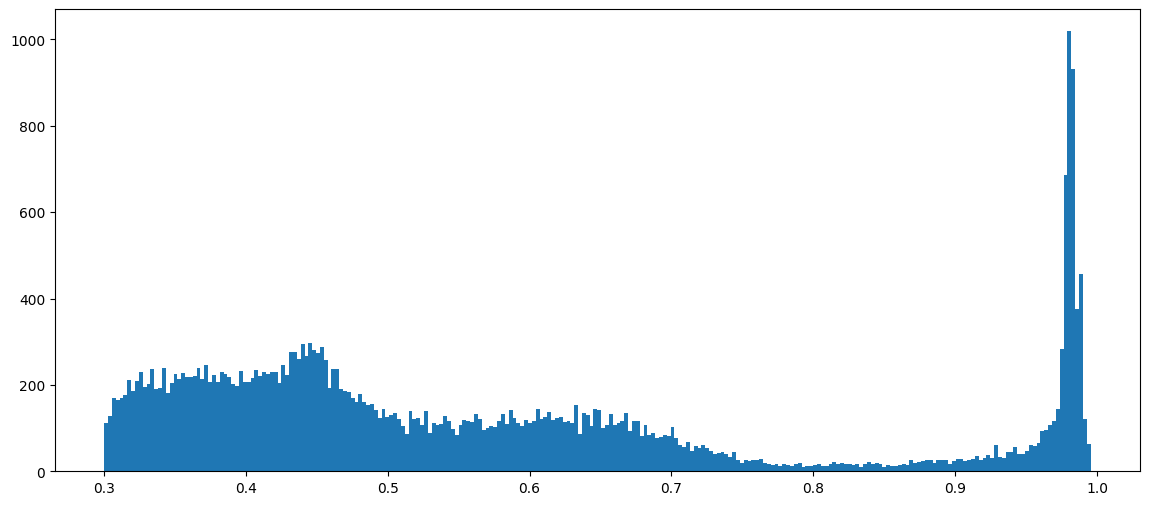

In [ ]:
# keep only pixels with a value higher than zero:
v = v[v>0.3]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

CONVOLUTION

ATTENTION ON DOIT D'ABORD METTRE IMAGE EN NIVEAU DE GRIS

In [ ]:
#j'importe image
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
I2 = sk.io.imread('in5481-119-15-3280309738.jpg') # read image using imread function
I2.shape

(150, 111, 3)

In [ ]:
on converti image en [0;255 ]

In [ ]:
IG = sk.color.rgb2gray(I2)
IG_uint8 = (IG * 255).astype(np.uint8)



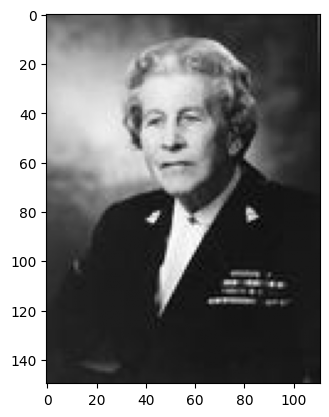

(150, 111)

In [ ]:
# Afficher l'image en niveaux de gris
import matplotlib.pyplot as plt
plt.imshow(IG, cmap='gray')
plt.show()
IG.shape


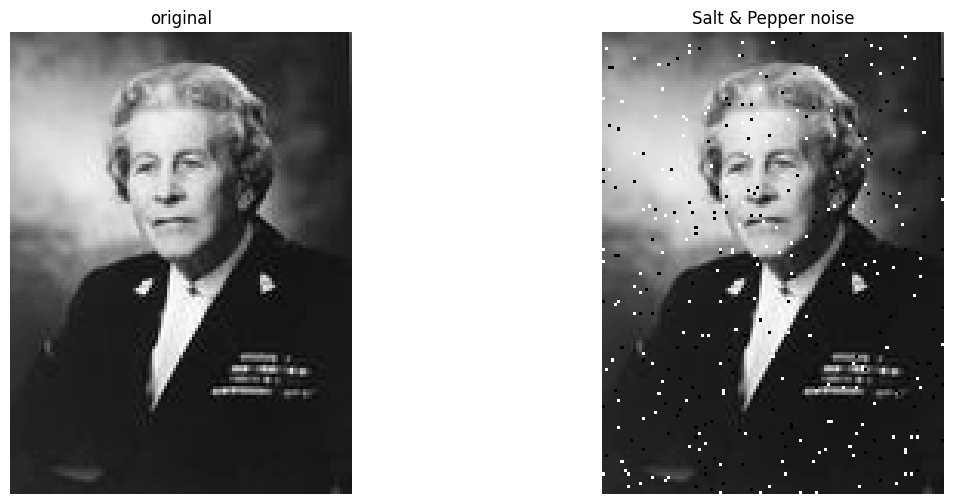

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(IG.shape) # uniform random numbers between 0 and 1
noisy_image = IG_uint8.copy()
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

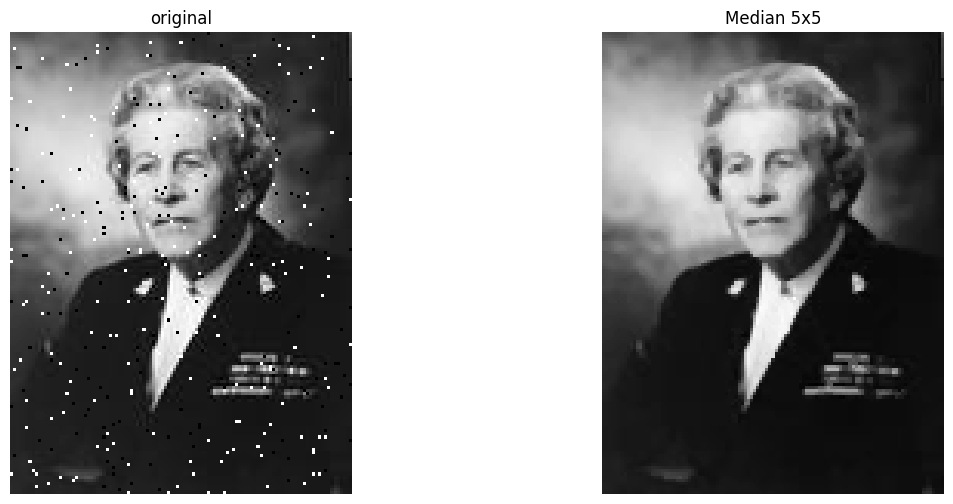

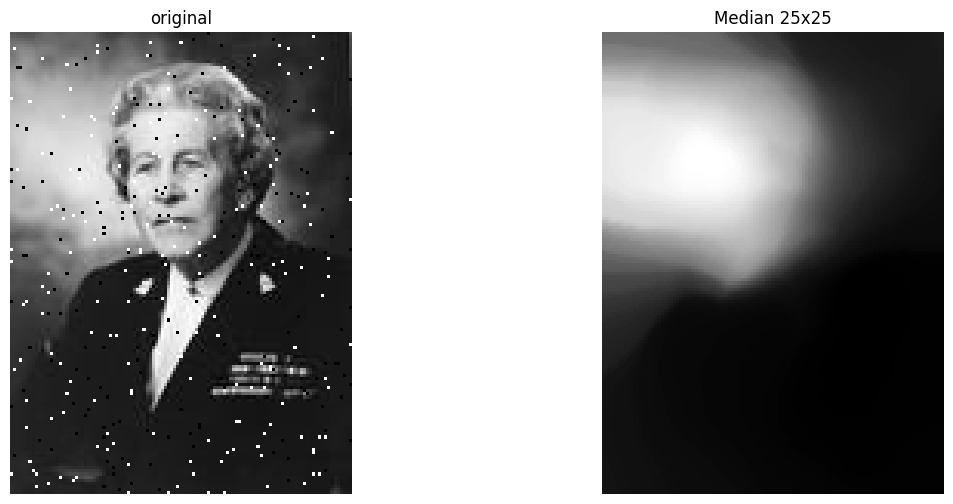

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(1) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')

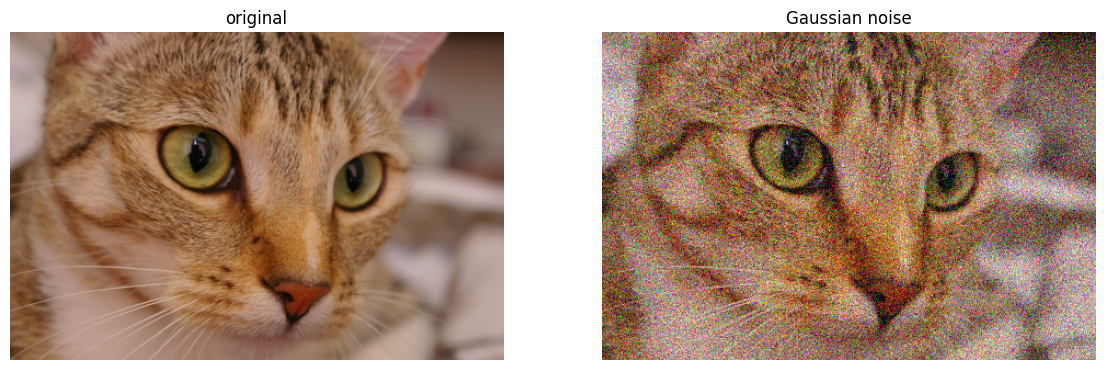

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


img = img_as_float(data.chelsea())
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

POUR OUVRIR FICHIER DEPUIS GITHUB

In [138]:
!git clone https://github.com/xtianu/EEIGM_COURSE_2025.git /content/EEIGM_COURSE_2025


Cloning into '/content/EEIGM_COURSE_2025'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 153 (delta 61), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (153/153), 42.14 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (61/61), done.


/tmp/ipython-input-3792676960.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(img_path) # visualize image using imshow function
/usr/local/lib/python3.12/dist-packages/skimage/io/_io.py:232: FutureWarning: `call_plugin` is deprecated since version 0.25 and will be removed in version 0.27. The plugin infrastructure of `skimage.io` is deprecated. Instead, use `imageio` or other I/O packages directly.
  arr = call_plugin('imread', arr, plugin=plugin)
/tmp/ipython-input-3792676960.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


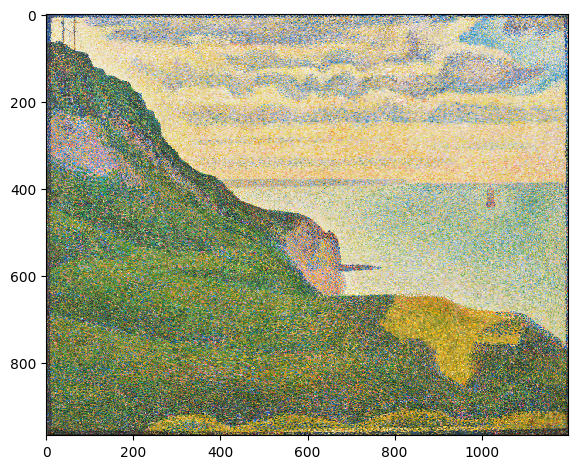

In [152]:
IP = '/content/seurat.jpg'

# Ouvrir et afficher l'image
sk.io.imshow(img_path) # visualize image using imshow function
sk.io.show()

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

img = sk.color.rgb2gray(Ipeinture)

sel5 = disk(5) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')